# Quantatively analyze contrast
Let's use the functions you've learned with Brian to look at some landsat data

Use the ls (list) command to see which files are in the director. If the files you need aren't there, then move the files into the foder.

In [ ]:
ls

In [2]:
# let's download the file

#six is used to make code valid on python 2 and python 3
import six
from six.moves.urllib.request import urlretrieve
url = "http://bit.ly/2uzjBOX"
# Download the file from `url` and save it locally under `file_name`:
rgbdatafile, headers = urlretrieve(url)

In [3]:
"""now lets use the landsat functions 
to look at the downloaded data

this is a transcription of landsat_display.py
"""
import landsat_sample_functions as lf

#read in landsat data
rgbn = lf.landsat_read(rgbdatafile)

In [4]:
#let's look at the contents of rgbn
rgbn

array([[[ 0.108,  0.115,  0.14 ,  0.185],
        [ 0.095,  0.104,  0.114,  0.196],
        [ 0.088,  0.098,  0.113,  0.178],
        ..., 
        [ 0.078,  0.092,  0.113,  0.07 ],
        [ 0.076,  0.091,  0.111,  0.067],
        [ 0.077,  0.091,  0.112,  0.067]],

       [[ 0.076,  0.09 ,  0.102,  0.22 ],
        [ 0.095,  0.103,  0.118,  0.208],
        [ 0.092,  0.103,  0.118,  0.193],
        ..., 
        [ 0.078,  0.092,  0.113,  0.069],
        [ 0.077,  0.092,  0.112,  0.068],
        [ 0.077,  0.091,  0.112,  0.068]],

       [[ 0.089,  0.098,  0.116,  0.199],
        [ 0.107,  0.116,  0.124,  0.22 ],
        [ 0.107,  0.112,  0.124,  0.178],
        ..., 
        [ 0.077,  0.091,  0.112,  0.068],
        [ 0.077,  0.092,  0.112,  0.067],
        [ 0.077,  0.091,  0.112,  0.067]],

       ..., 
       [[ 0.431,  0.413,  0.419,  0.491],
        [ 0.402,  0.387,  0.394,  0.457],
        [ 0.372,  0.359,  0.371,  0.42 ],
        ..., 
        [ 0.115,  0.117,  0.136,  0.132],
 

In [6]:
dimensions = rgbn.shape
print('dimensions of rgbn = {}'.format(dimensions))

"""
trim to rgb by slicing off last channel
: means take all values in that dim
0:3 means take 0, 1, 2 - slicing stops 1 before last
"""
rgb = rgbn[:, :, 0:3]

rgb.shape

dimensions of rgbn = (815, 921, 4)


(815, 921, 3)

# What do the dimensions mean?

(number of rows, number of columns, channels)
 
* 815 rows, 921 columns, and 3 channels
* 815 x 921 is the image size, 
* 3 channels = red, green, blue

![numpy](https://github.com/story645/EAS213/raw/master/2016/figs/axis.png)

<IPython.core.display.Javascript object>


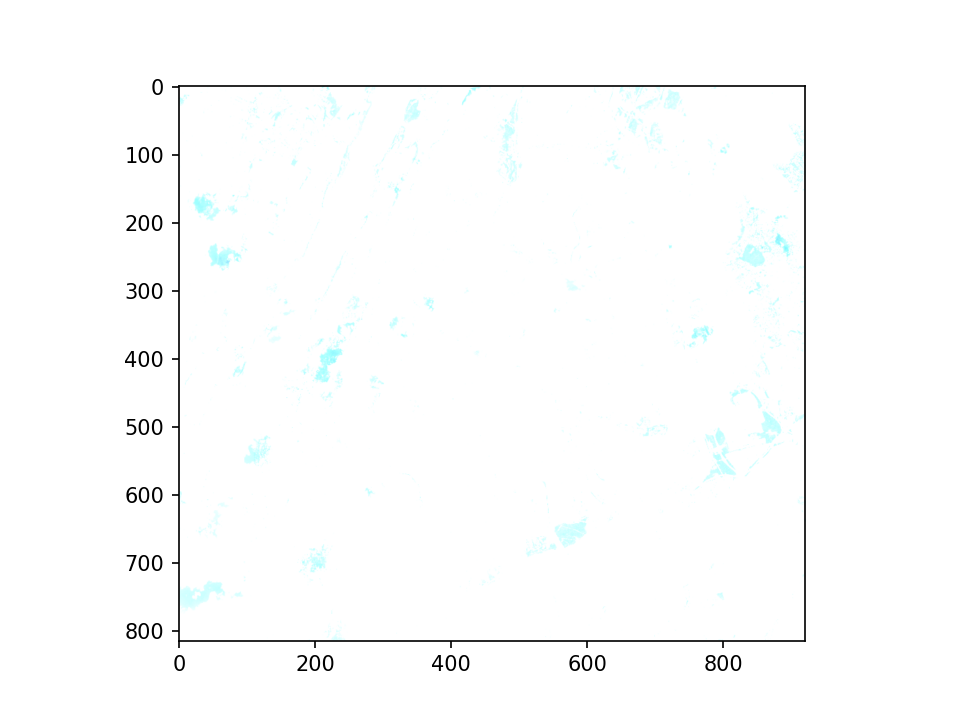

Enter Contrast, 0 to exit: 100
Enter Contrast, 0 to exit: 20
Enter Contrast, 0 to exit: 0


In [7]:
#let's see the pictures in the notebook
%matplotlib notebook
rgbc = lf.rgb_display(rgb)

In [11]:
rgbc

array([[[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       ..., 
       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,

In [12]:
# alternative to rgb_display:
def rgb_contrast(rgb_array, contrast):
    """returns an RGB image adjusted based
    on contrast level
    """
    rgbc_array = rgb_array * contrast
    low = (rgbc_array < 0)
    rgbc_array[low] = 0

    high = (rgbc_array > 1)
    rgbc_array[high] = 1
    
    return rgbc_array

# Is there's a difference between the two arrays?

<IPython.core.display.Javascript object>


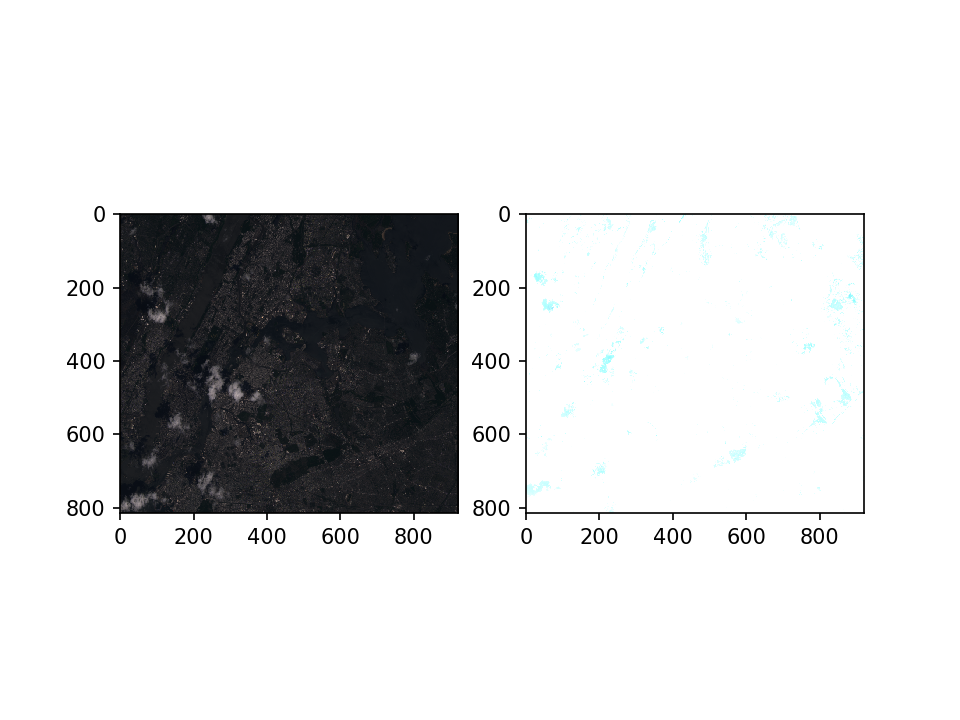

In [13]:
#let's compare the plots side by side

import matplotlib.pyplot as plt

# create an image and add two subplots to it
# arrange those subplots into cols
fig, (ax1, ax2) = plt.subplots(ncols=2)

# plot the rgb array
ax1.imshow(rgb)

# plot the rgbc array
ax2.imshow(rgbc)

fig.show()

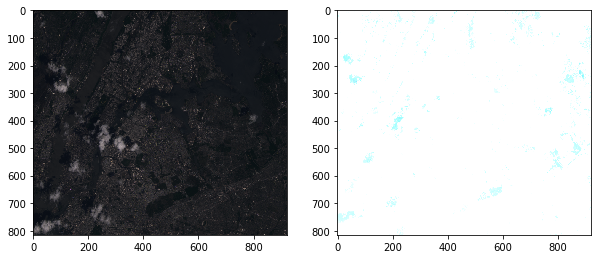

In [29]:
#figsize = (width, height) makes the figure bigger/smaller
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

ax1.imshow(rgb)
ax2.imshow(rgbc)

fig.show()

# How'd that happen?
Each image is made up of 3 channels, so let's look at how the channels changed. 

How do we pull out channels? Each layer of the array (that 3rd dimension) is a color, so we grab individual layers. 

In [14]:
# Channel is the last dimension 
# computer scientists count from 0
# : means give all the values (all rows & columns)
red = rgb[:,:,0]
# can also use ... to mean everything 
green = rgb[...,1]
blue = rgb[...,2]

<IPython.core.display.Javascript object>


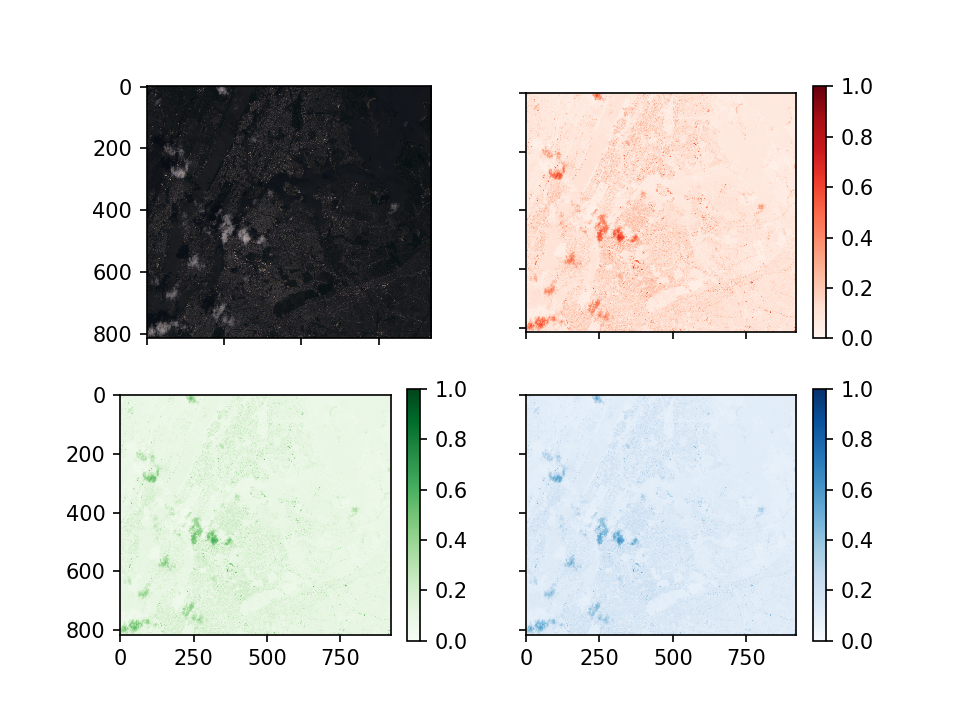

In [17]:
# plot each of the individual channels and compare to image
# arrange the subplots as a 2x2 table
# sharex/sharey zooms all the images when 1 is zoomed
fig, axes = plt.subplots(nrows=2, ncols=2, 
                         sharex=True, sharey=True)

"""axes is a numpy array of shape (2,2) and has coordinates
  [(0,0), (0,1)]
  [(1,0), (1,1)]
"""
# plot rbc in the upper left corner 
im = axes[0,0].imshow(rgb)

# plot the red channel in the upper right corner
# color it from white to red
# 0 and below = lightest red, 1 and above = darkest red
# between 0-1 is along the red gradient (normalization)
r = axes[0,1].imshow(red, cmap="Reds", vmin=0, vmax=1)
# attach a colorbar to the red channel image & axes
fig.colorbar(r, ax=axes[0,1])

# plot the green channel
g = axes[1,0].imshow(green, cmap="Greens", vmin=0, vmax=1)
fig.colorbar(g, ax=axes[1,0])

# plot the blue channel
b = axes[1,1].imshow(blue, cmap="Blues", vmin=0, vmax=1)
fig.colorbar(b, ax=axes[1,1])

fig.show()

#clean up the plots so they're the right size
for ax in axes.flatten():
    ax.set_adjustable('box-forced')

In [18]:
# let's make functions to simplify, maybe...

def plot_channel(fig, ax, data, cmap):
    im = ax.imshow(data, cmap=cmap, vmin=0, vmax=1)
    fig.colorbar(im, ax=ax)


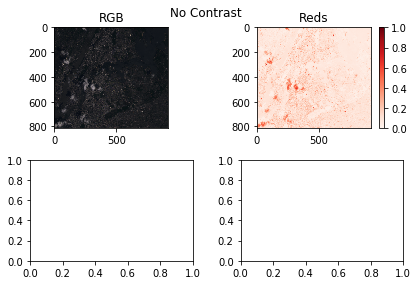

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=2)

rgb_im = axes[0,0].imshow(rgb)

plot_channel(fig, axes[0,1], red, "Reds")


fig.suptitle("No Contrast") # set the figure title (super title)
axes[0,0].set_title("RGB") # set the axes[0,0] title
axes[0,1].set(title="Reds") # set the axes[0,1] title

for ax in axes.flatten():
    ax.set_adjustable('box-forced')
fig.show()

plt.tight_layout() #spreads out subplots

# To do: 
Use the same visualization code to visualize the 3 channels of the contrasted (rgbc) image

# More quantative way of computing differences?

![distro](https://github.com/story645/EAS213/raw/master/2016/figs/distro.jpg)

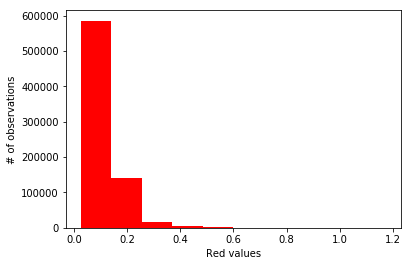

In [37]:
# let's start with a histogram of the red channel...

fig, ax = plt.subplots()

"""flatten takes a row X column table (or something even more complicate)
and turns it into a list"""
# coloring it red just for simplicity
ax.hist(red.flatten(), bins=10, color="red")

#let's label all the things
ax.set(xlabel="red pixel values", ylabel="# of observations")     
fig.show()

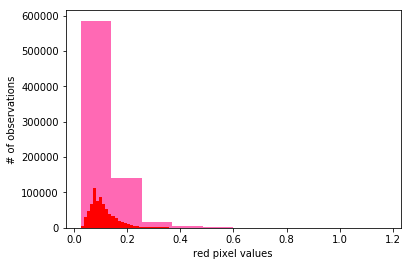

In [44]:
# What does changing the bin size do?

fig, ax = plt.subplots()

ax.hist(red.flatten(), bins=10, color="hotpink")
ax.hist(red.flatten(), bins=100, color="red")

ax.set(xlabel="red pixel values", ylabel="# of observations")     
fig.show()

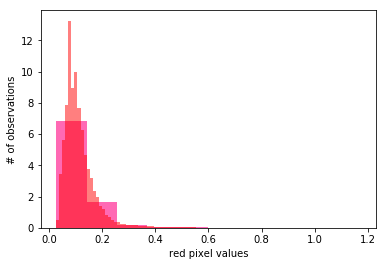

In [45]:
# Huh? same are under curve: 1 red bin = 10 pink bins
# Can see this by using normed=True to equalize

fig, ax = plt.subplots()

ax.hist(red.flatten(), bins=10, normed=True, color="hotpink")
ax.hist(red.flatten(), bins=100, normed=True, color="red", alpha=.5)

ax.set(xlabel="red pixel values", ylabel="# of observations")     
fig.show()

In [56]:
# rough bin size rule? 2*n^(1/3)
2*red.size**(1./3)

181.761713676356

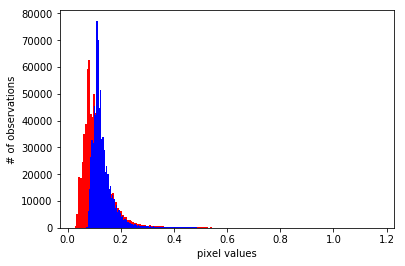

In [57]:
# blue channel?

fig, ax = plt.subplots()
ax.hist(red.flatten(), bins=180, color="red")

ax.hist(blue.flatten(), bins=180, color="blue")

ax.set(xlabel="pixel values", 
       ylabel="# of observations")
fig.show()

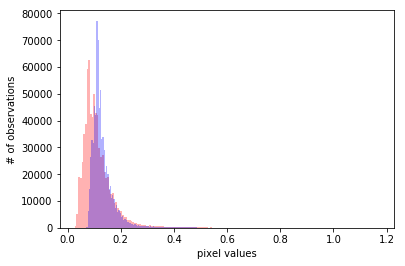

In [59]:
# eek! let's use alpha to make things transparent
fig, ax = plt.subplots()
ax.hist(red.flatten(), bins=180, color="red", alpha=0.3)
ax.hist(blue.flatten(), bins=180, color="blue", alpha=0.3)

ax.set(xlabel="pixel values", 
       ylabel="# of observations")
fig.show()

# To do
* Plot histogram for green channel
* Plot histogram for channels in contrasted data
* Compare histograms of contrasted and raw images

# How do we go from frequencies to distributions?

histograms are raw counts = frequencies,
distributions are the probabilities of events occuring

We use density estimation to trace a curve over the histogram

In [61]:
import scipy.stats as st
import numpy as np

"""estimate the probability function  for red channel pixels, 
which means P(red channel pixel) = probability of that pixel
being that value"""

Pred = st.gaussian_kde(red.flatten())


# color values range between 0 - 1 

# generate a 100 pixels equally spaced between 0 and 1
# this is an estimation of all possible pixel values
pixel_values = np.linspace(0,1,100) 

# pass each of those values into the probability function 
# to find the likelihood of it happening
pixel_probs_red = Pred(pixel_values) 

In [ ]:
fig, ax = plt.subplots()

"""normed=True takes the histogram and puts it on a
0-1 scale. This is to match the probability function since 
0 = lowest probability, 1 = highest probability
"""

# use the label keyword to label the plot
ax.hist(red.flatten(), color="red",normed=True,
        alpha=0.3, label="Hist(pixel)")

ax.plot(pixel_values, pixel_probs, 
        color="red", label="$P(pixel)$")

ax.set(ylabel="# of observations", xlabel="pixel values")

ax.legend() #add the legend to the image
fig.show()



# To Do
* Compute and plot the distributions of the green and blue channels
* Compute and plot the distributions of the channels for rgbc
* Discuss the differences between the uncontrasted and contrasted images
